In [206]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
%matplotlib inline

In [207]:
data=pd.read_csv("census.csv")
data


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


In [208]:
data.shape

(45222, 14)

In [209]:
data.head(n=1)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


income_raw= data['income']
features_raw=data.drop('income',axis=1)

In [210]:
data.drop(['education-num','marital-status','race','sex'],axis=1,inplace=True)
data


,age,workclass,education_level,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Adm-clerical,Not-in-family,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Husband,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,Handlers-cleaners,Not-in-family,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,Handlers-cleaners,Husband,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,Prof-specialty,Wife,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,Exec-managerial,Wife,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,Other-service,Not-in-family,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,Exec-managerial,Husband,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,Prof-specialty,Not-in-family,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,Exec-managerial,Husband,5178.0,0.0,40.0,United-States,>50K


In [211]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [212]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [213]:
from matplotlib import pyplot as plt

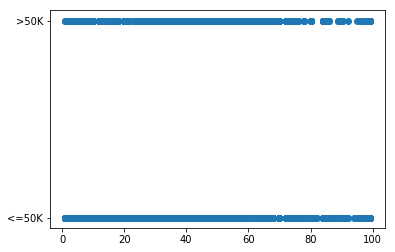

In [214]:
plt.scatter(data['hours-per-week'],data['income'])

In [215]:
km=KMeans(n_clusters=2)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

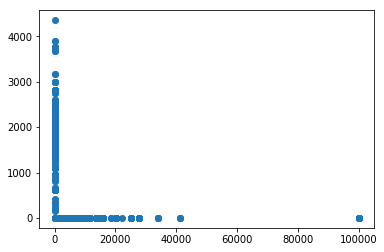

In [216]:
plt.scatter(data['capital-gain'],data['capital-loss'])

In [217]:
dummies=pd.get_dummies(data.workclass)
dummies              

,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
5,0,0,1,0,0,0,0
6,0,0,1,0,0,0,0
7,0,0,0,0,1,0,0
8,0,0,1,0,0,0,0
9,0,0,1,0,0,0,0


In [218]:
data2=pd.concat([data,dummies],axis='columns')
data2

,age,workclass,education_level,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,income,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,39,State-gov,Bachelors,Adm-clerical,Not-in-family,2174.0,0.0,40.0,United-States,<=50K,0,0,0,0,0,1,0
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Husband,0.0,0.0,13.0,United-States,<=50K,0,0,0,0,1,0,0
2,38,Private,HS-grad,Handlers-cleaners,Not-in-family,0.0,0.0,40.0,United-States,<=50K,0,0,1,0,0,0,0
3,53,Private,11th,Handlers-cleaners,Husband,0.0,0.0,40.0,United-States,<=50K,0,0,1,0,0,0,0
4,28,Private,Bachelors,Prof-specialty,Wife,0.0,0.0,40.0,Cuba,<=50K,0,0,1,0,0,0,0
5,37,Private,Masters,Exec-managerial,Wife,0.0,0.0,40.0,United-States,<=50K,0,0,1,0,0,0,0
6,49,Private,9th,Other-service,Not-in-family,0.0,0.0,16.0,Jamaica,<=50K,0,0,1,0,0,0,0
7,52,Self-emp-not-inc,HS-grad,Exec-managerial,Husband,0.0,0.0,45.0,United-States,>50K,0,0,0,0,1,0,0
8,31,Private,Masters,Prof-specialty,Not-in-family,14084.0,0.0,50.0,United-States,>50K,0,0,1,0,0,0,0
9,42,Private,Bachelors,Exec-managerial,Husband,5178.0,0.0,40.0,United-States,>50K,0,0,1,0,0,0,0


In [219]:
final=data2.drop(['workclass'],axis='columns')
final

,age,education_level,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,income,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,39,Bachelors,Adm-clerical,Not-in-family,2174.0,0.0,40.0,United-States,<=50K,0,0,0,0,0,1,0
1,50,Bachelors,Exec-managerial,Husband,0.0,0.0,13.0,United-States,<=50K,0,0,0,0,1,0,0
2,38,HS-grad,Handlers-cleaners,Not-in-family,0.0,0.0,40.0,United-States,<=50K,0,0,1,0,0,0,0
3,53,11th,Handlers-cleaners,Husband,0.0,0.0,40.0,United-States,<=50K,0,0,1,0,0,0,0
4,28,Bachelors,Prof-specialty,Wife,0.0,0.0,40.0,Cuba,<=50K,0,0,1,0,0,0,0
5,37,Masters,Exec-managerial,Wife,0.0,0.0,40.0,United-States,<=50K,0,0,1,0,0,0,0
6,49,9th,Other-service,Not-in-family,0.0,0.0,16.0,Jamaica,<=50K,0,0,1,0,0,0,0
7,52,HS-grad,Exec-managerial,Husband,0.0,0.0,45.0,United-States,>50K,0,0,0,0,1,0,0
8,31,Masters,Prof-specialty,Not-in-family,14084.0,0.0,50.0,United-States,>50K,0,0,1,0,0,0,0
9,42,Bachelors,Exec-managerial,Husband,5178.0,0.0,40.0,United-States,>50K,0,0,1,0,0,0,0


In [220]:
final=data2.drop(['occupation','native-country'],axis='columns')
final

,age,workclass,education_level,relationship,capital-gain,capital-loss,hours-per-week,income,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,39,State-gov,Bachelors,Not-in-family,2174.0,0.0,40.0,<=50K,0,0,0,0,0,1,0
1,50,Self-emp-not-inc,Bachelors,Husband,0.0,0.0,13.0,<=50K,0,0,0,0,1,0,0
2,38,Private,HS-grad,Not-in-family,0.0,0.0,40.0,<=50K,0,0,1,0,0,0,0
3,53,Private,11th,Husband,0.0,0.0,40.0,<=50K,0,0,1,0,0,0,0
4,28,Private,Bachelors,Wife,0.0,0.0,40.0,<=50K,0,0,1,0,0,0,0
5,37,Private,Masters,Wife,0.0,0.0,40.0,<=50K,0,0,1,0,0,0,0
6,49,Private,9th,Not-in-family,0.0,0.0,16.0,<=50K,0,0,1,0,0,0,0
7,52,Self-emp-not-inc,HS-grad,Husband,0.0,0.0,45.0,>50K,0,0,0,0,1,0,0
8,31,Private,Masters,Not-in-family,14084.0,0.0,50.0,>50K,0,0,1,0,0,0,0
9,42,Private,Bachelors,Husband,5178.0,0.0,40.0,>50K,0,0,1,0,0,0,0


In [221]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [232]:
x=final.drop(['workclass','relationship','capital-gain','capital-loss','income','education_level','age'],axis='columns')
x

,hours-per-week,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,40.0,0,0,0,0,0,1,0
1,13.0,0,0,0,0,1,0,0
2,40.0,0,0,1,0,0,0,0
3,40.0,0,0,1,0,0,0,0
4,40.0,0,0,1,0,0,0,0
5,40.0,0,0,1,0,0,0,0
6,16.0,0,0,1,0,0,0,0
7,45.0,0,0,0,0,1,0,0
8,50.0,0,0,1,0,0,0,0
9,40.0,0,0,1,0,0,0,0


In [233]:
y=final.age
y

0        39
1        50
2        38
3        53
4        28
5        37
6        49
7        52
8        31
9        42
10       37
11       30
12       23
13       32
14       34
15       25
16       32
17       38
18       43
19       40
20       54
21       35
22       43
23       59
24       56
25       19
26       39
27       49
28       23
29       20
         ..
45192    25
45193    31
45194    49
45195    60
45196    39
45197    38
45198    43
45199    23
45200    73
45201    35
45202    66
45203    27
45204    40
45205    51
45206    22
45207    64
45208    55
45209    38
45210    58
45211    32
45212    48
45213    61
45214    31
45215    25
45216    48
45217    33
45218    39
45219    38
45220    44
45221    35
Name: age, Length: 45222, dtype: int64

In [234]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [237]:
model.predict([[40.0,0,0,0,0,0,1,0]])

array([39.60156508])